In [2]:
import numpy as np
import pandas as pd


In [7]:
df_red = pd.read_csv('winequality-red.csv', delimiter=';')

In [8]:
df_white = pd.read_csv('winequality-white.csv', delimiter=';')

In [9]:
df_red.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [22]:
df_red.quality.value_counts(sort=False)

3     10
4     53
5    681
6    638
7    199
8     18
Name: quality, dtype: int64

In [21]:
df_white.quality.value_counts()

6    2198
5    1457
7     880
8     175
4     163
3      20
9       5
Name: quality, dtype: int64

In [163]:
# Logistic Regression
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import 

In [169]:
# load the iris datasets
y = df_red.quality
X = df_red.iloc[:, :-1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.7, random_state=1294)

# fit a logistic regression model to the data
model = KNeighborsClassifier(5)
model.fit(X_train, y_train)

print(model)

# make predictions
predicted = model.predict(X_test)

# summarize the fit of the model
print(metrics.classification_report(y_test, predicted))
print(metrics.confusion_matrix(y_test, predicted))

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')
             precision    recall  f1-score   support

          3       0.00      0.00      0.00         6
          4       0.11      0.06      0.08        33
          5       0.50      0.61      0.55       483
          6       0.42      0.44      0.43       446
          7       0.33      0.11      0.16       141
          8       0.00      0.00      0.00        11

avg / total       0.43      0.45      0.43      1120

[[  0   0   4   2   0   0]
 [  1   2  14  16   0   0]
 [  0   9 295 169  10   0]
 [  2   3 227 196  18   0]
 [  0   4  45  77  15   0]
 [  0   0   4   5   2   0]]


/home/cneiderer/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [118]:
# load the iris datasets
y = df_red.quality
X = df_red.iloc[:, :-1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.7, random_state=129)

# fit a logistic regression model to the data
model = LogisticRegression(C=5)
model.fit(X_train, y_train)

print(model)

# make predictions
predicted = model.predict(X_test)

# summarize the fit of the model
print(metrics.classification_report(y_test, predicted))
print(metrics.confusion_matrix(y_test, predicted))

LogisticRegression(C=5, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
             precision    recall  f1-score   support

          3       0.00      0.00      0.00         8
          4       1.00      0.02      0.05        43
          5       0.64      0.74      0.68       489
          6       0.54      0.62      0.57       443
          7       0.38      0.11      0.17       127
          8       0.00      0.00      0.00        10

avg / total       0.57      0.58      0.55      1120

[[  0   0   8   0   0   0]
 [  0   1  31  11   0   0]
 [  0   0 362 121   6   0]
 [  0   0 152 275  16   0]
 [  0   0  15  98  14   0]
 [  0   0   0   9   1   0]]


/home/cneiderer/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [119]:
cm = metrics.confusion_matrix(y_test, predicted)
cm

array([[  0,   0,   8,   0,   0,   0],
       [  0,   1,  31,  11,   0,   0],
       [  0,   0, 362, 121,   6,   0],
       [  0,   0, 152, 275,  16,   0],
       [  0,   0,  15,  98,  14,   0],
       [  0,   0,   0,   9,   1,   0]])

In [56]:
cm.diagonal().sum() / cm.sum()

0.5714285714285714

In [29]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp

In [58]:
# Binarize the output
classes = [3, 4, 5, 6, 7, 8]
y2 = label_binarize(y, classes=classes)
n_classes = y2.shape[1]

In [113]:
# shuffle and split training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y2, test_size=.7, random_state=129)

# Learn to predict each class against the other
classifier = OneVsRestClassifier(LogisticRegression(C=5))
y_score = classifier.fit(X_train, y_train).decision_function(X_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

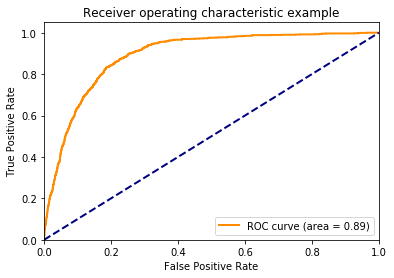

In [114]:
plt.figure()
lw = 2
plt.plot(fpr['micro'], tpr['micro'], color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc['micro'])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

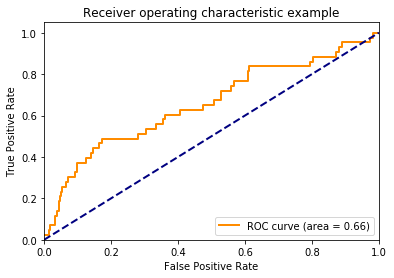

In [115]:
plt.figure()
lw = 2
plt.plot(fpr[1], tpr[1], color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[1])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

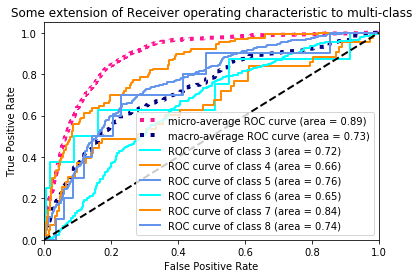

In [116]:
# Compute macro-average ROC curve and ROC area

# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure()
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(classes[i], roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()

In [117]:
# Micro average confusion matrix
metrics.confusion_matrix(y_test.ravel(), classifier.predict(X_test).ravel())

array([[5332,  268],
       [ 667,  453]])

In [77]:
from sklearn.svm import SVC

In [80]:
y = df_red.quality
X = df_red.iloc[:, :-1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.7, random_state=129)

In [174]:
# Train model
clf3 = SVC(C=1, kernel='rbf',
           class_weight=dict(df_red['quality'].value_counts()), # penalize
           probability=True)
 
clf3.fit(X_train, y_train)
 
# Predict on training set
pred_y3 = clf3.predict(X_test)
 

In [175]:
# Is our model still predicting just one class?
print(np.unique(pred_y3 ))

[4 5 6 7 8]


In [176]:
# How's our accuracy?
print(metrics.accuracy_score(y_test, pred_y3) )

0.503571428571


In [177]:
print(clf3)

# summarize the fit of the model
print(metrics.classification_report(y_test, pred_y3))
print(metrics.confusion_matrix(y_test, pred_y3))

SVC(C=1, cache_size=200,
  class_weight={5: 681, 6: 638, 7: 199, 4: 53, 8: 18, 3: 10}, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
             precision    recall  f1-score   support

          3       0.00      0.00      0.00         6
          4       0.03      0.03      0.03        33
          5       0.56      0.64      0.60       483
          6       0.50      0.47      0.49       446
          7       0.46      0.30      0.36       141
          8       0.05      0.09      0.07        11

avg / total       0.50      0.50      0.50      1120

[[  0   2   3   1   0   0]
 [  0   1  16  13   2   1]
 [  0  17 309 141  13   3]
 [  0  11 186 211  32   6]
 [  0   2  35  54  42   8]
 [  0   0   3   4   3   1]]


/home/cneiderer/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [90]:
# What about AUROC?
prob_y3 = clf3.predict_proba(X_test)
prob_y3 = [p[1] for p in prob_y3]

In [155]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [179]:
y = df_red.quality
X = df_red.iloc[:, :-1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.7, random_state=129)

# Train model
clf4 = RandomForestClassifier(n_estimators=1000, random_state=1294)

In [181]:
clf4.fit(X_train, y_train, )

pred_y4 = clf4.predict(X_test)

# Is our model still predicting just one class?
print( np.unique( pred_y4 ) )
 
# How's our accuracy?
print( metrics.accuracy_score(y_test, pred_y4) )
 

[5 6 7 8]
0.613392857143


In [182]:
print(clf4)

# summarize the fit of the model
print(metrics.classification_report(y_test, pred_y4))
print(metrics.confusion_matrix(y_test, pred_y4))

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=1,
            oob_score=False, random_state=1294, verbose=0,
            warm_start=False)
             precision    recall  f1-score   support

          3       0.00      0.00      0.00         8
          4       0.00      0.00      0.00        43
          5       0.67      0.74      0.70       489
          6       0.57      0.60      0.58       443
          7       0.53      0.47      0.50       127
          8       0.50      0.10      0.17        10

avg / total       0.58      0.61      0.60      1120

[[  0   0   7   1   0   0]
 [  0   0  27  16   0   0]
 [  0   0 361 116  12   0]
 [  0   0 138 265  39   1]
 [  0   0   7  60  60   0]
 [  0   0   1  

/home/cneiderer/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [ ]:
# What about AUROC?
prob_y4 = clf4.predict_proba(X)
prob_y4 = [p[1] for p in prob_y4]
print( roc_auc_score(y, prob_y_4) )
# 0.999078798186

In [183]:
from sklearn.naive_bayes import GaussianNB

In [185]:
y = df_red.quality
X = df_red.iloc[:, :-1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.7, random_state=129)

# Train model
clf5 = GaussianNB()

In [186]:
clf5.fit(X_train, y_train, )

pred_y5 = clf5.predict(X_test)

# Is our model still predicting just one class?
print( np.unique( pred_y5 ) )
 
# How's our accuracy?
print( metrics.accuracy_score(y_test, pred_y5) )

[3 4 5 6 7 8]
0.499107142857


In [187]:
print(clf4)

# summarize the fit of the model
print(metrics.classification_report(y_test, pred_y5))
print(metrics.confusion_matrix(y_test, pred_y5))

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=1,
            oob_score=False, random_state=1294, verbose=0,
            warm_start=False)
             precision    recall  f1-score   support

          3       0.00      0.00      0.00         8
          4       0.18      0.23      0.20        43
          5       0.65      0.55      0.60       489
          6       0.50      0.54      0.52       443
          7       0.29      0.31      0.30       127
          8       0.06      0.20      0.10        10

avg / total       0.52      0.50      0.51      1120

[[  0   3   5   0   0   0]
 [  0  10  21  11   1   0]
 [  7  28 267 164  22   1]
 [  2  12 110 240  71   8]
 [  0   2   5  59  40  21]
 [  0   0   0  